In [ ]:
###!pip install apyori

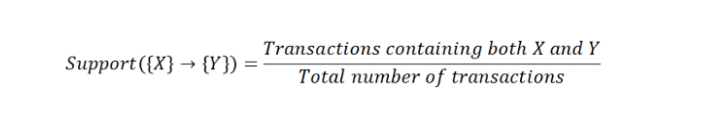

### Confidence :

This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents. That is to answer the question — of all the transactions containing say, {Captain Crunch}, how many also had {Milk} on them? We can say by common knowledge that {Captain Crunch} → {Milk} should be a high confidence rule. Technically, confidence is the conditional probability of occurrence of consequent given the antecedent.

Let us consider few more examples before moving ahead. What do you think would be the confidence for {Butter} → {Bread}?

That is, what fraction of transactions having butter also had bread? Very high i.e. a value close to 1? That’s right. 

What about {Yogurt} → {Milk}? High again. {Toothbrush} → {Milk}? Not so sure? Confidence for this rule will also be high since {Milk} is such a frequent itemset and would be present in every other transaction.

It does not matter what you have in the antecedent for such a frequent consequent. The confidence for an association rule having a very frequent consequent will always be high.
Total transactions = 100. 10 of them have both milk and toothbrush, 70 have milk but no toothbrush and 4 have toothbrush but no milk.
Consider the numbers from figure on the left. Confidence for {Toothbrush} → {Milk} will be 10/(10+4) = 0.7
Looks like a high confidence value. But we know intuitively that these two products have a weak association and there is something misleading about this high confidence value. Lift is introduced to overcome this challenge.
Considering just the value of confidence limits our capability to make any business inference.

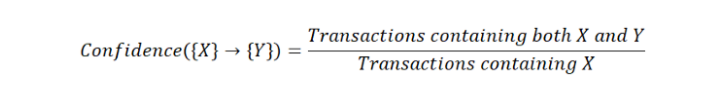

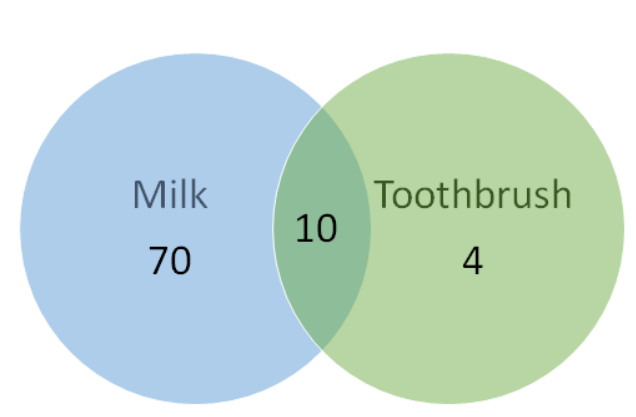

Lift controls for the support (frequency) of consequent while calculating the conditional probability of occurrence of {Y} given {X}. Lift is a very literal term given to this measure. Think of it as the *lift* that {X} provides to our confidence for having {Y} on the cart. To rephrase, lift is the rise in probability of having {Y} on the cart with the knowledge of {X} being present over the probability of having {Y} on the cart without any knowledge about presence of {X}. Mathematically,
Image for post
In cases where {X} actually leads to {Y} on the cart, value of lift will be greater than 1. Let us understand this with an example which will be continuation of the {Toothbrush} → {Milk} rule.
Probability of having milk on the cart with the knowledge that toothbrush is present (i.e. confidence) : 10/(10+4) = 0.7
Now to put this number in perspective, consider the probability of having milk on the cart without any knowledge about toothbrush: 80/100 = 0.8
These numbers show that having toothbrush on the cart actually reduces the probability of having milk on the cart to 0.7 from 0.8! This will be a lift of 0.7/0.8 = 0.87. Now that’s more like the real picture. A value of lift less than 1 shows that having toothbrush on the cart does not increase the chances of occurrence of milk on the cart in spite of the rule showing a high confidence value. A value of lift greater than 1 vouches for high association between {Y} and {X}. More the value of lift, greater are the chances of preference to buy {Y} if the customer has already bought {X}. Lift is the measure that will help store managers to decide product placements on aisle.
Association Rule Mining

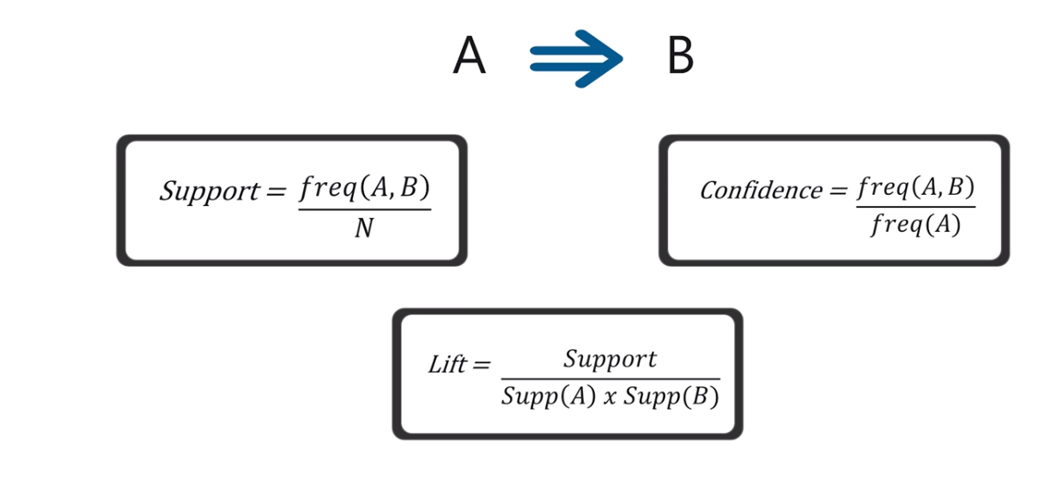

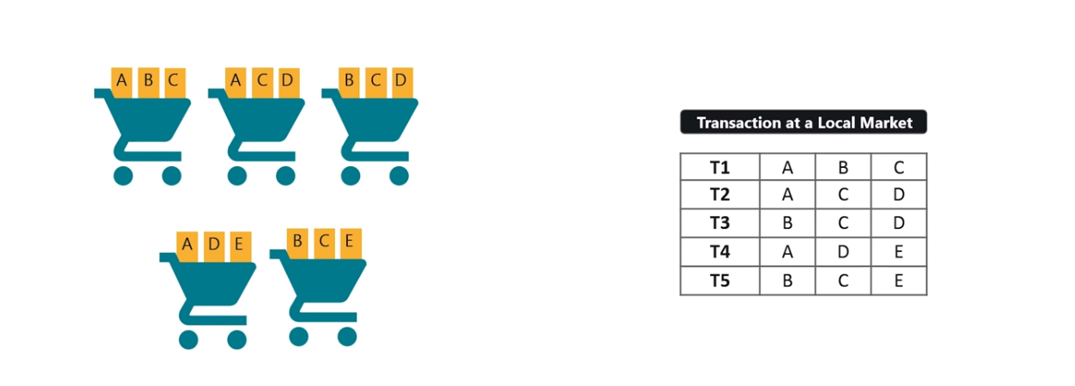

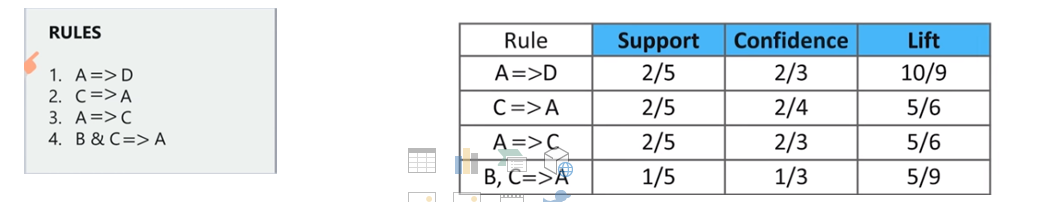

In [ ]:
# Market Basket Optimization Associated Rule Learning - Apriori

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [ ]:
dataset

In [ ]:
dataset.shape

In [ ]:
#transactions =  dataset.values.tolist()
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [ ]:
transactions

In [ ]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2) 

In [ ]:
# Visualising the results
results = list(rules)

In [ ]:
results

In [ ]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")